<a href="https://colab.research.google.com/github/hamsterjoa/Machine_Learning_Practical/blob/main/Directing_customers_to_subscription_through_app_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
from dateutil import parser

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy/input/appdata10.csv')

## EDA

In [4]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning

In [6]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

### Plotting

In [7]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


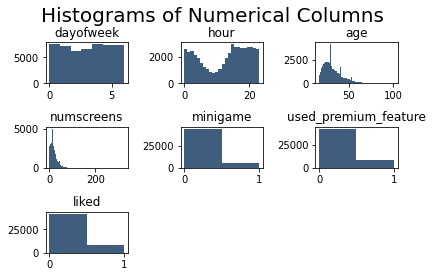

In [8]:
# Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

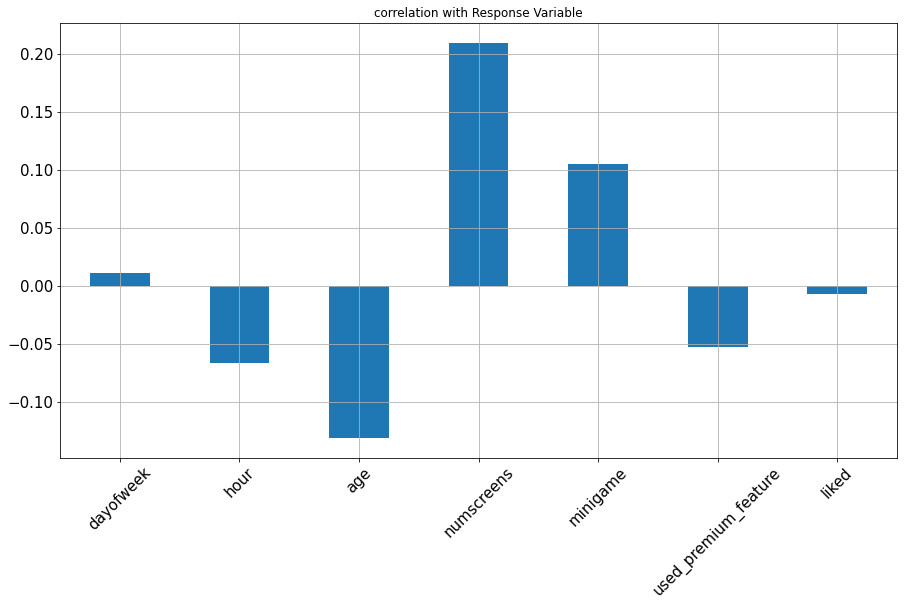

In [9]:
# Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (15, 8),
                                             title = 'correlation with Response Variable',
                                             fontsize = 15, rot = 45,
                                             grid = True)

- dayofweek는 반응변수와 양의 상관관계가 있는 것으로 보입니다. 더 후반부의 요일일수록 등록할 가능성이 높아지는 건데, 관계 정도는 매우 적습니다.

- hour는 음의 상관관계를 보입니다. 즉 시간이 이를수록 등록할 가능성이 올라갑니다.

- age도 음의 상관관계가 있으므로 나이가 많을수록 등록할 가능성이 적다는 것을 알 수 있으며, 따라서 젊은 사람들이 제품에 등록할 가능성이 더 높은 것으로 보이며 젊은 사람들이 모바일 앱 제품을 더 많이 사용하기 때문에 타당합니다.

- numscreens는 반응변수와 양의 상관관계가 있습니다. 더 많은 화면을 봤다는 것은 제품을 더 많이 사용했다는 것이고 제품을 많이 사용할수록 등록할 가능성이 더 높으니까 타당한 결과입니다.

- minigame은 게임을 할 가능성이 있다면 더 많이 참여할테니 등록할 가능성도 더 높습니다.

- 흥미롭게도, 프리미엄 기능 사용은 반응변수와 음의 상관관계가 있습니다. 즉 프리미엄 기능을 사용할 가능성이 높을수록 등록할 가능성이 낮아집니다. 따라서 프리미엄 기능을 알고 있다면 제품이 마음에 들지 않거나 비용을 지불할 가치가 있다는 확신이 없기 때문에 등록은 안할 수도 있습니다.

- 마지막으로 반응변수와 liked는 상관관계가 매우 작은 것으로 보입니다. 아마도 임의성 때문이므로 여기서 알아낼 수 있는 건 별로 없다고 판단됩니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


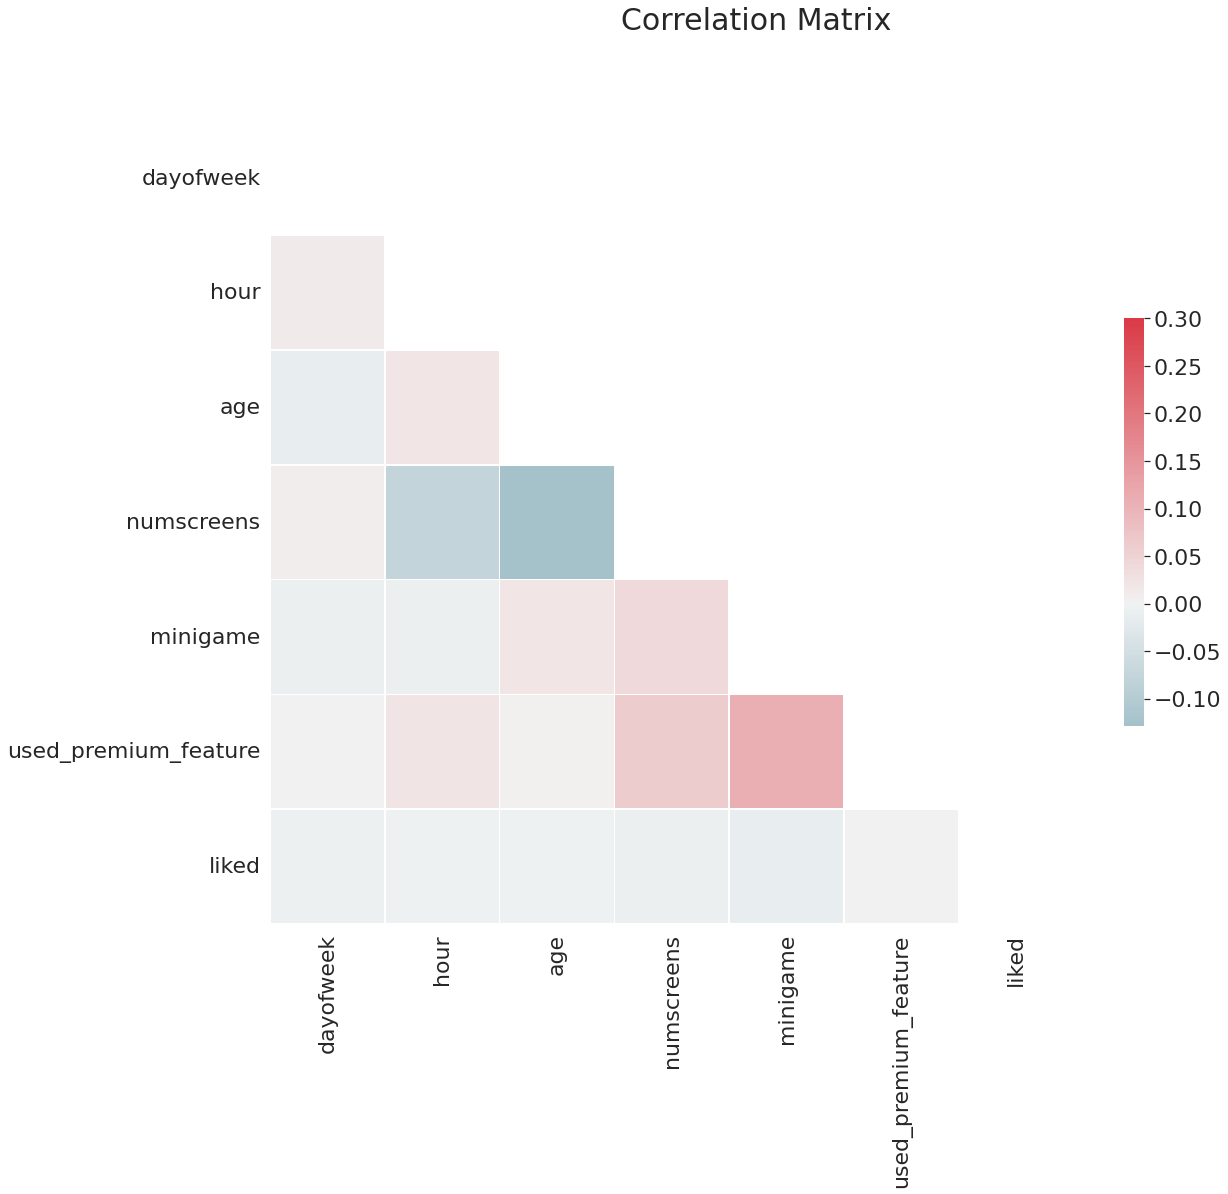

In [10]:
# Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize=30)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Engineering

### Formatting Data Columns

In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [13]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

### Selecting Time For Response

In [14]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

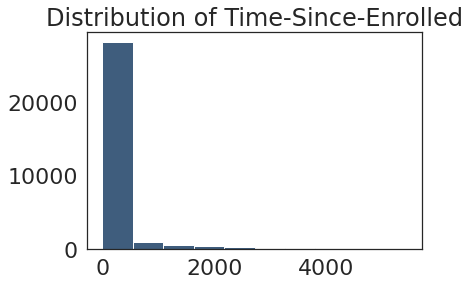

In [15]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

분포도에서 대다수의 사람들이 처음 500시간 이내에 등록한다는 것을 알 수 있습니다. 그러나 오른쪽에 꼬리 분포 모양이 있는걸 보면 실제론 처음 500시간 동안이 아니라 처음 100시간 또는 그 이하에서 등록이 발생하는 걸 수도 있습니다.

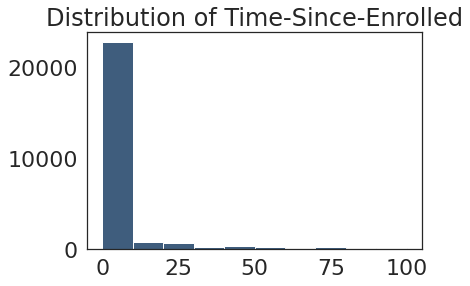

In [16]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

범위 조정 결과, 대다수의 등록이 처음 10시간 이내에 발생합니다.

In [17]:
# 실제로 등록한 사람들이라도 48시간 제한 시간을 초과하면 등록하지 않은 것(0)으로 처리
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [18]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

### Formatting the screen_list Field

In [19]:
# Load Top Screens
top_screens = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy/input/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [20]:
# Mappting Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [21]:
for sc in top_screens:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset["screen_list"] = dataset.screen_list.str.replace(sc+",", "")

In [22]:
dataset["Other"] = dataset.screen_list.str.count(",")

In [23]:
dataset = dataset.drop(columns = ["screen_list"])

### Funnels

In [24]:
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns=savings_screens)

In [25]:
cm_screens = ["Credit1",
              "Credit2",
              "Credit3",
              "Credit3Container",
              "Credit3Dashboard"]

dataset["CMCount"] = dataset[cm_screens].sum(axis=1) 
dataset = dataset.drop(columns=cm_screens)           

In [26]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)               

In [27]:
loan_screens = ["Loan",
                "Loan2",
                "Loan3",
                "Loan4"]

dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [28]:
dataset = dataset.drop(['SavingsCount'], axis=1)

In [29]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,10,2,0,1


In [30]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,5.00000,3.000000,3.000000


In [31]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other', 'CMCount',
       'CCCount', 'LoansCount'],
      dtype='object')

In [32]:
dataset.to_csv("new_appdata10.csv", index = False)

In [33]:
dataset = pd.read_csv('new_appdata10.csv')

## Data Preprocessing

In [34]:
response = dataset["enrolled"]
dataset = dataset.drop(columns='enrolled')

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [36]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Model Buliding

In [38]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=1, random_state = 0, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7681

In [41]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test,y_pred))

0.7618952017667135
0.7700892857142857
0.7659703300030276


Test Data Accuracy: 0.7681


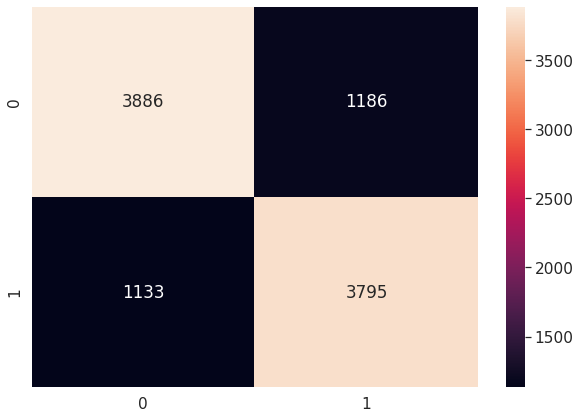

In [42]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [43]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.767 (+/- 0.009)


이 예측 결과와 이 예측이 나온 실제 유저를 종합해 어떤 유저가 등록하는, 혹은 등록하지 않는 걸로 예측 되었는지 살펴보겠습니다.

In [44]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032573
1,hour,-0.003607
2,age,-0.149679
3,numscreens,-0.130442
4,minigame,-0.026469
5,used_premium_feature,-0.065920
6,liked,0.010687
7,location,-0.028337
8,Institutions,-0.062206
9,VerifyPhone,0.650346


## Model Tuning

In [45]:
# Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 26.28 seconds


In [46]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7674249999999999, {'C': 0.01, 'penalty': 'l2'})

In [47]:
# Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 21.09 seconds


In [48]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

0.767175

## Conclusion

- 우리의 노력은 모든 신규 사용자를 "가입 가능성이 매우 높음" 또는 "가능성이 없음"으로 분류하는 모델을 제공했습니다. 매일 새로 설치할 때 예측 결과를 실행하고 정확도가 일관되는지 여부를 추가로 확인할 수 있습니다. 거기서부터 우리는 "구독할 것 같지 않은" 사용자들에게만 우리의 마케팅 범위를 좁힐 수 있고, 이를 통해 구독률을 높일 수 있습니다.

- 전체 구독의 증가는 이 모델이 회사에 미치는 이점을 측정할 수 있습니다. 이미 구독할 가능성이 있는 사람들에게 보다 탈퇴 가능성이 높은 이용자에게 거절할 수 없는 제안을 하면 유료 가입자로 전환할 수 있을 것입니다. 예를 들어, '1개월 무료' 또는 '연간 50% 할인' 형태의 서비스를 제공할 수 있습니다. 후자의 경우, 우리가 오랜 기간 동안 사용자를 가두기 때문에 회사에 전반적인 이익을 가져다 주는 방식으로 적용될 수 있다는 것을 보여줍니다!